In [1]:
import os, sys
# import importlib
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretrainingV1 import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv11 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [2]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=5000,
                                                           debug=True,
                                                          designated_ukc_cls=5)

ablation set to : 5000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 4000, val_0:, 500, test_0:, 500, train_1:, 4000, val_1:, 500, test_1:, 500, 4049 data in class 2 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
902 data in class 3 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    4000
1    4000
Name: 

got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=2.6
got all the dataset
got all the dataset
vocab_size: 50
got all the dataset
2023-03-16 20:12:28.210220
starting to create ptmodel automatically
staring pre trining
Epoch 1/10
250/250 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9914 - precision: 0.9914 - recall: 0.9914
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2023-03-16_20_12_28.210220\
INFO:tensorflow:Assets written to: data\ptmodel_2023-03-16_20_12_28.210220\assets
250/250 [==============================] - 25s 98ms/step - loss: 0.0231 - accuracy: 0.9914 - precision: 0.9914 - recall: 0.9914 - val_loss: 6.7102e-06 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.0010
Epoch 2/10
250/250 [==============================] - ETA: 0s - loss: 6.0385e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
250/2

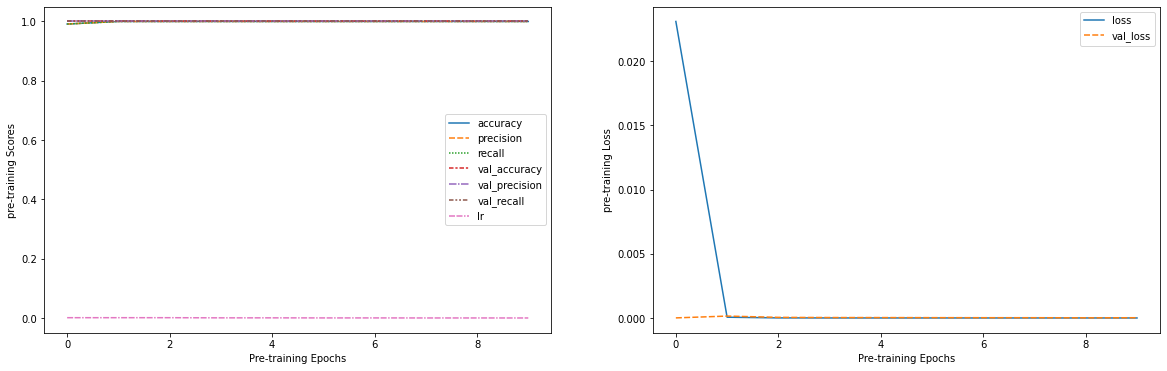

run_id:  2023-03-16_20_16_27.796782_54fcf7d2c40911ed8594ac8247733f47
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


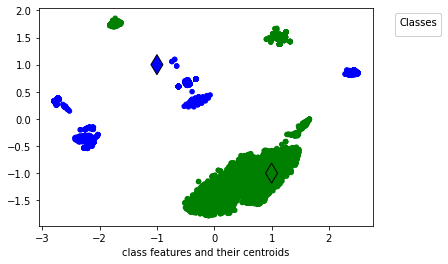

run_id:  2023-03-16_20_17_59.276614_8b83aec0c40911edb136ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.29it/s]


epoch: 1/9, train_loss: 5.472644329071045, F1_train: 0.4993742177722153 F1_val: 0.47705483530692805


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:35<00:00,  7.11it/s]


epoch: 2/9, train_loss: 5.472643852233887, F1_train: 0.49987496874218557 F1_val: 0.49897360703812316


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.33it/s]


epoch: 3/9, train_loss: 5.472641944885254, F1_train: 0.9542229499249556 F1_val: 0.9969574409037483


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s]


epoch: 4/9, train_loss: 5.47264289855957, F1_train: 0.9543718455872323 F1_val: 0.9969573286906247


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.32it/s]


epoch: 5/9, train_loss: 5.472644329071045, F1_train: 0.9543718455872323 F1_val: 0.9969574036511156
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.21it/s]


epoch: 6/9, train_loss: 5.472643852233887, F1_train: 0.9543718455872323 F1_val: 0.9969573662470496
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.30it/s]


epoch: 7/9, train_loss: 5.472641944885254, F1_train: 0.9543718455872323 F1_val: 0.9969573662470496
train score not improving  going to wait state 3
val score not improving  going to wait state 3


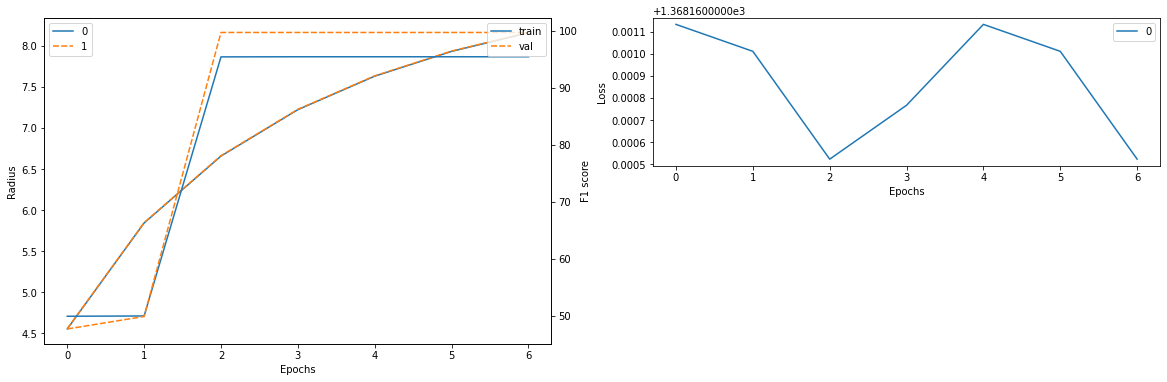

classification report for training:
[[4000    0    0]
 [   0 3331  669]
 [   0    0    0]]
91.64
f1_weighted: 0.9543718455872323, f1_macro: 0.6362478970581549, f1_micro: 0.916375, f_measure: {'Known': 95.4372, 'Open': 0, 'F1-score': 63.6248}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      0.83      0.91      4000
           5       0.00      0.00      0.00         0

    accuracy                           0.92      8000
   macro avg       0.67      0.61      0.64      8000
weighted avg       1.00      0.92      0.95      8000

classification report for test data:
[[493   0   0]
 [  0 496   0]
 [  0   0 163]]
100.0
f1_weighted: 1.0, f1_macro: 1.0, f1_micro: 1.0, f_measure: {'Known': 100.0, 'Open': 100.0, 'F1-score': 100.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       496
           5   

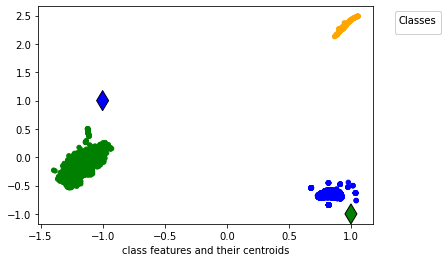

INFO:tensorflow:Assets written to: ram://cb371f70-625b-4990-b1fd-ae40ef15e7f2/assets


In [3]:
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=False,  
                 centroid_class_color=False,
                 tsne_n_iter=2000, tsne_perplexity=86,
                 embedding_size=16, oc_lr=2.6, pt_epochs=10, oc_epochs=9,)

In [4]:
oset.total_features.shape

(1152, 16)

In [5]:
len(oset.total_preds)

1152

In [6]:
len(oset.total_labels)

8000

In [7]:
oset.centroids.shape

TensorShape([2, 16])

In [8]:
kwargs = {}
tsne_perplexity = kwargs.get('tsne_perplexity', 200)
tsne_early_exaggeration = kwargs.get('tsne_early_exaggeration', 12)
tsne_random_state = kwargs.get('tsne_random_state', 123)
tsne_lr = kwargs.get('tsne_lr', 80)
tsne_n_iter = kwargs.get('tsne_n_iter', 1000)
tsne_n_iter_without_progress = kwargs.get('tsne_n_iter_without_progress', 300)
tsne = TSNE(perplexity=tsne_perplexity, early_exaggeration=tsne_early_exaggeration, 
                    random_state=tsne_random_state, learning_rate=tsne_lr, n_iter=tsne_n_iter,
                   n_iter_without_progress=tsne_n_iter_without_progress)

In [9]:
features = np.array(oset.total_features)
print('features:', features.shape)
centroids = oset.centroids.numpy()
labels = np.array(oset.total_preds)
print('labels:', labels.shape)
features_n_centroid = np.concatenate([features, centroids], axis=0)
print('features_n_centroid:', features_n_centroid.shape)
tout = tsne.fit_transform(features_n_centroid)
tsne_features = tout[:features.shape[0]]
tsne_centroids = tout[features.shape[0]:]
print('tsne_features:', tsne_features.shape)
print('tsne_centroids:', tsne_centroids.shape)

fixed_color_maps = np.array(["green","blue","yellow","pink","black","orange","purple",
                                     "beige","brown","gray","cyan","magenta", "red",])


features: (1152, 16)
labels: (1152,)
features_n_centroid: (1154, 16)
tsne_features: (1152, 2)
tsne_centroids: (2, 2)


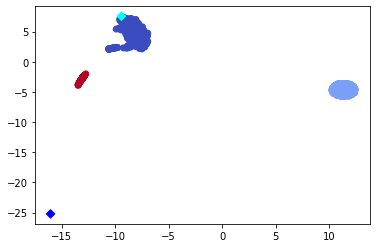

In [10]:
import matplotlib.pyplot as plt
clist=['cyan', 'blue', 'magenta', 'red']
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap=plt.colormaps['coolwarm'], 
            # c=fixed_color_maps[labels]
            c=labels
           )
plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='D', 
            c=clist[:oset.num_classes],
           cmap=plt.colormaps['plasma'],
           )

In [11]:
oset.num_classes

2

In [12]:
clist[:oset.num_classes]

['cyan', 'blue']

the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


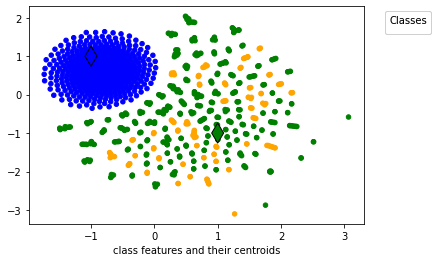

In [13]:
oset.plot_centroids(use_labels=oset.total_preds, tsne_perplexity=1,
                   manual_color_map=True, centroid_black=False,  )

perpexity : 13
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


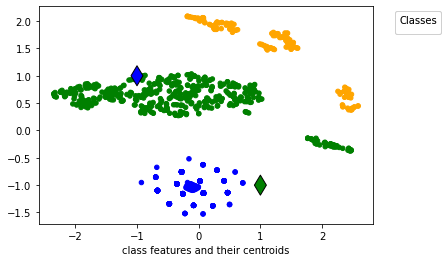

perpexity : 17
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


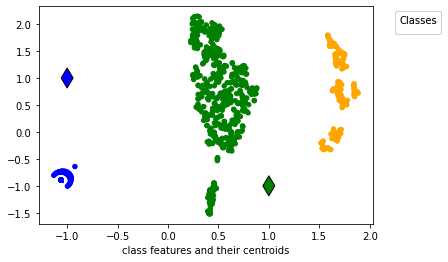

perpexity : 30
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


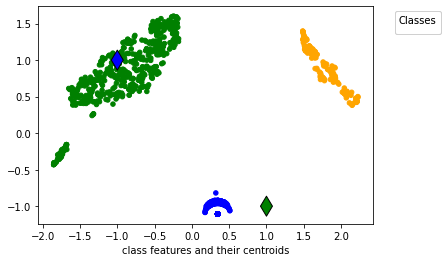

perpexity : 40
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


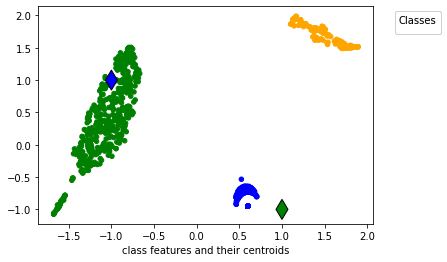

perpexity : 45
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


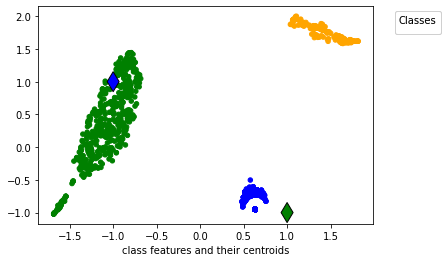

perpexity : 86
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'red']


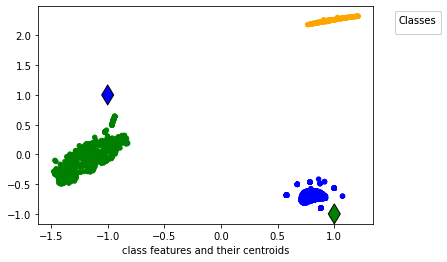

In [14]:
for i in (13, 17, 30, 40, 45, 86):
    print('perpexity :', i)    
    oset.plot_centroids(use_labels=oset.total_preds, centroid_black=False,
                        manual_color_map=True, tsne_perplexity=i)

In [15]:
oset.radius

<tf.Variable 'boundary_loss/Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[7.2215953],
       [7.225646 ]], dtype=float32)>

ablation set to : 1500
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 1200, val_0:, 150, test_0:, 150, train_1:, 1200, val_1:, 150, test_1:, 150, train_2:, 1200, val_2:, 150, test_2:, 150, 902 data in class 3 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 150
75 data in class 6 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    1200
1    1200
2    1200
Name: label, dtype: int64
val: 0    150
1    150
2    150
Name: label, dtype: int64
test: 0    150
1    150
2    1

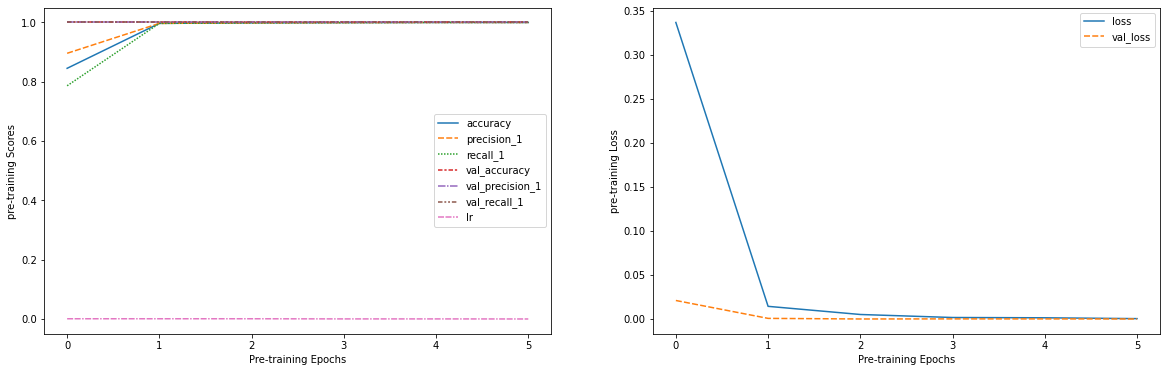

run_id:  2023-03-16_20_25_05.629025_89a3e5ccc40a11edb9f2ac8247733f47
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


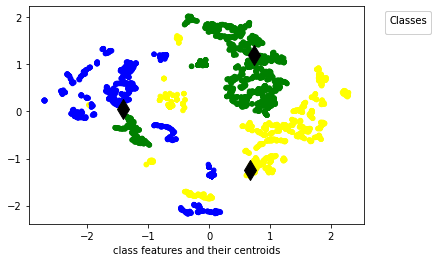

run_id:  2023-03-16_20_25_23.849718_948027a1c40a11ed82cfac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.63it/s]


epoch: 1/10, train_loss: 21.18422508239746, F1_train: 0.29597519868534955 F1_val: 0.3262296365914787


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.63it/s]


epoch: 2/10, train_loss: 21.204294204711914, F1_train: 0.3529935918189797 F1_val: 0.36487895918235924


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.64it/s]


epoch: 3/10, train_loss: 21.179765701293945, F1_train: 0.3835067752588223 F1_val: 0.38328015152549316


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.64it/s]


epoch: 4/10, train_loss: 21.189477920532227, F1_train: 0.4115518334991735 F1_val: 0.4158022161784704


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.60it/s]


epoch: 5/10, train_loss: 21.21527099609375, F1_train: 0.4260592223161969 F1_val: 0.4204971195578132


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.58it/s]


epoch: 6/10, train_loss: 21.195327758789062, F1_train: 0.4331157489221234 F1_val: 0.42374856464451843


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.11it/s]


epoch: 7/10, train_loss: 21.22696876525879, F1_train: 0.4467271291906324 F1_val: 0.425980732637556


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.64it/s]


epoch: 8/10, train_loss: 21.18912124633789, F1_train: 0.45423371631039294 F1_val: 0.4315137987012987


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.62it/s]


epoch: 9/10, train_loss: 21.204605102539062, F1_train: 0.460986527075956 F1_val: 0.4325060532687651


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:14<00:00,  7.65it/s]


epoch: 10/10, train_loss: 21.16193962097168, F1_train: 0.4716037585252751 F1_val: 0.43781527441485074


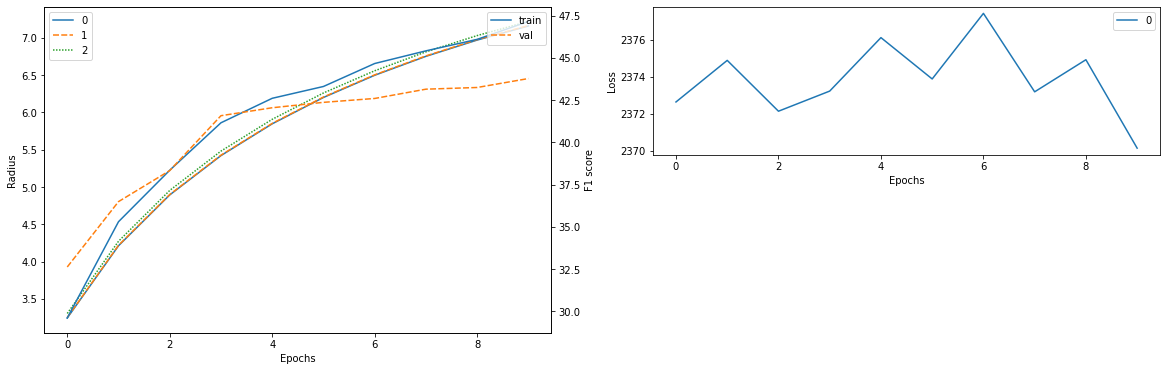

classification report for training:
[[ 885    0    0  309]
 [   0   85    0 1108]
 [   0    0  331  866]
 [   0    0    0    0]]
36.3
f1_weighted: 0.4726075940319589, f1_macro: 0.3544093172393077, f1_micro: 0.3630022321428571, f_measure: {'Known': 47.2546, 'Open': 0, 'F1-score': 35.4409}
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1194
           1       1.00      0.07      0.13      1193
           2       1.00      0.28      0.43      1197
           5       0.00      0.00      0.00         0

    accuracy                           0.36      3584
   macro avg       0.75      0.27      0.35      3584
weighted avg       1.00      0.36      0.47      3584

classification report for test data:
[[143   0   0   0]
 [  0   0   0 149]
 [  0   0  85  58]
 [  0   0   0 141]]
64.06
f1_weighted: 0.5745411292589004, f1_macro: 0.5805752879130341, f1_micro: 0.640625, f_measure: {'Known': 58.1871, 'Open': 57.6687, 'F1-score': 58.0575}
     

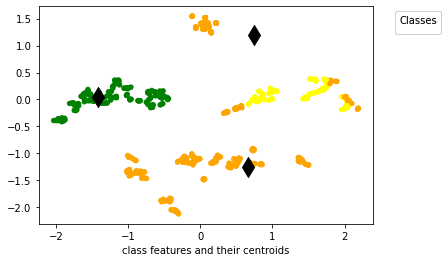

INFO:tensorflow:Assets written to: ram://e49c2bb5-09aa-48b6-a1b5-5b8e80245446/assets


In [16]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=1500,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=6, oc_epochs=10,)

In [17]:
# FP = add vertically ( col, the col sum is the actual. e.g. col-0 sum is actual for class-0 - 143 actual sample. Out of which one predicted as FP=Unknown class-5)
# TP = add horizontally ( rows  ,each row sum is the predictions)
#### class-0:  Precision: 142 / (142+1) = 0.99 , TP=142, FP = 1 ,  Recall: 142/142 = 1, FN = 0 ,   
#### class-1: Precission: 0/0
#### Class-2: Precision: 111/111, FP = 0 , Recall: 111/ (111 + 33) = 0.77 , FN = 33
#### class-5: Precission: 142/ (142+33+147+0) = 142/142+ 180 = 142/322=0.44,FP=180,  Recall: 142/(142+1) = 0.99, FN=1 

In [18]:
# For the "unknown detection without openset"  - this numbers are from the figure 5.4.1 of thesis report 
### class-0: Precision: 86/(86+106) = 86/192 = 0.4479 ~ 0.45 , Recall: 86/(86+77+89) = 86/86+168 = 86/252 = 0.34
### class-1: Precision: 114/(114+77) = 114/191 = 59.68~0.60 , FP =77, Recall = 114/(114+106+104) = 114/(114+210) = 114/324=0.35, FN = 210


perpexity : 13
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


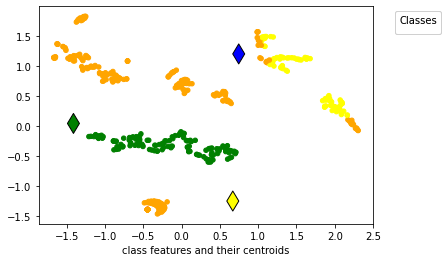

perpexity : 17
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


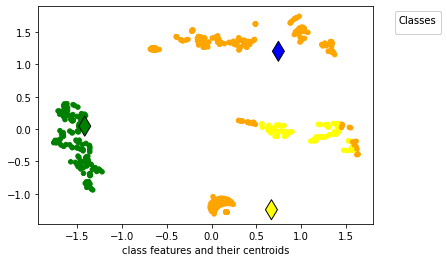

perpexity : 30
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


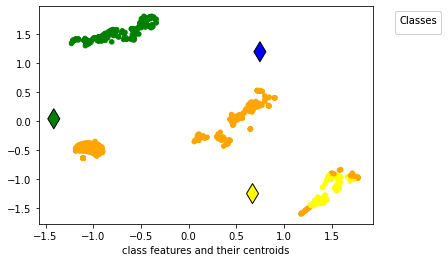

perpexity : 40
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


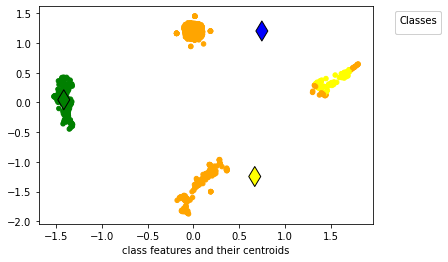

perpexity : 45
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


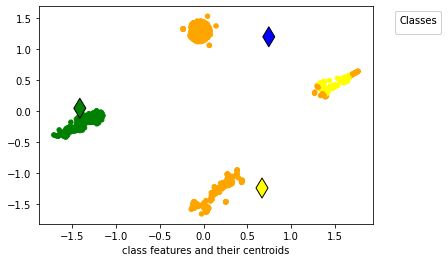

perpexity : 86
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


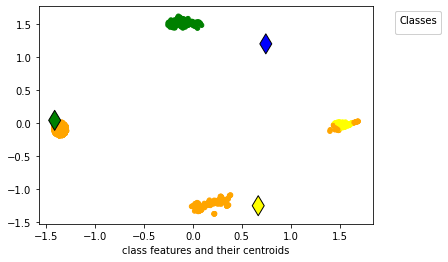

In [19]:
for i in (13, 17, 30, 40, 45, 86):
    print('perpexity :', i)    
    oset.plot_centroids(use_labels=oset.total_preds, centroid_black=False,
                        manual_color_map=True, tsne_perplexity=i)

In [20]:
oset.radius

<tf.Variable 'boundary_loss_1/Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[7.158868 ],
       [7.164533 ],
       [7.2192526]], dtype=float32)>